In [39]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV, learning_curve
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam

# Load the dataset
df = pd.read_csv(r"C:\Users\franc\OneDrive - Northeastern University\Data Sci Eng Methods\Industrial Equipment Monitoring Dataset.csv")

In [40]:
# Display the first few rows of the dataset
print(df.head())



   temperature   pressure  vibration   humidity   equipment       location  \
0    58.180180  25.029278   0.606516  45.694907     Turbine        Atlanta   
1    75.740712  22.954018   2.338095  41.867407  Compressor        Chicago   
2    71.358594  27.276830   1.389198  58.954409     Turbine  San Francisco   
3    71.616985  32.242921   1.770690  40.565138        Pump        Atlanta   
4    66.506832  45.197471   0.345398  43.253795        Pump       New York   

   faulty  
0       0  
1       0  
2       0  
3       0  
4       0  


In [41]:
# Data Preprocessing
# Separate features and target
X = df.drop('faulty', axis=1)  # Drop the target column to get features
y = df['faulty']  # Use the target column

# Identify categorical and numeric columns
categorical_cols = X.select_dtypes(include=['object']).columns
numeric_cols = X.select_dtypes(include=['int64', 'float64']).columns

# Preprocessing for numeric and categorical data
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())  # Scale numeric features
])

categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))  # One-hot encode categorical features
])

# Combine preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

In [42]:
# Apply preprocessing to the data
X_preprocessed = preprocessor.fit_transform(X)


In [43]:
# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X_preprocessed, y, test_size=0.2, random_state=42)

In [44]:
# Function to plot learning curves
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None, n_jobs=None, train_sizes=np.linspace(0.1, 1.0, 5)):
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    plt.grid()
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")
    plt.legend(loc="best")
    plt.show()

Fitting 5 folds for each of 18 candidates, totalling 90 fits
[CV] END ......................C=0.1, gamma=1, kernel=linear; total time=   0.1s
[CV] END ......................C=0.1, gamma=1, kernel=linear; total time=   0.1s
[CV] END ......................C=0.1, gamma=1, kernel=linear; total time=   0.1s
[CV] END ......................C=0.1, gamma=1, kernel=linear; total time=   0.1s
[CV] END ......................C=0.1, gamma=1, kernel=linear; total time=   0.1s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.3s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.3s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.2s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.4s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.3s
[CV] END ....................C=0.1, gamma=0.1, kernel=linear; total time=   0.2s
[CV] END ....................C=0.1, gamma=0.1, k

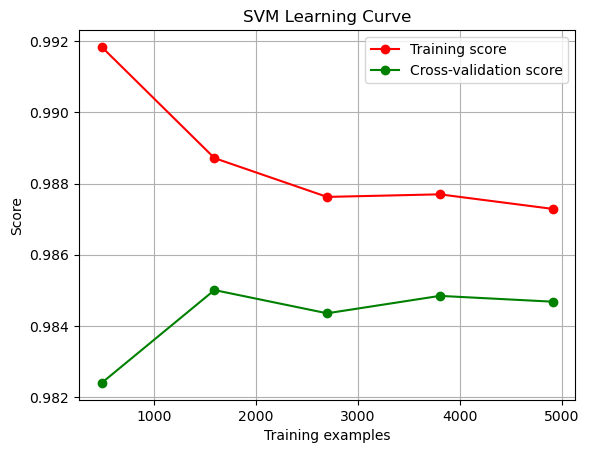

In [45]:
# SVM with GridSearchCV
param_grid_svm = {'C': [0.1, 1, 10], 'gamma': [1, 0.1, 0.01], 'kernel': ['linear', 'rbf']}
grid_svm = GridSearchCV(SVC(), param_grid_svm, refit=True, verbose=2)
grid_svm.fit(X_train, y_train)

# Evaluate SVM
y_pred_svm = grid_svm.predict(X_test)
print("SVM Results:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_svm)}")
print(f"Precision: {precision_score(y_test, y_pred_svm)}")
print(f"Recall: {recall_score(y_test, y_pred_svm)}")
print(f"F1-Score: {f1_score(y_test, y_pred_svm)}")
plot_learning_curve(grid_svm.best_estimator_, "SVM Learning Curve", X_train, y_train)

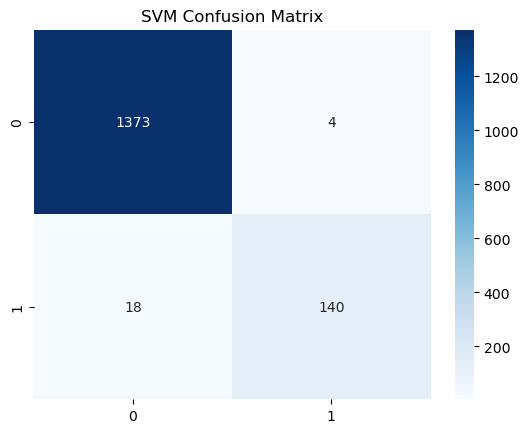

In [46]:
# Confusion Matrix for SVM
cm_svm = confusion_matrix(y_test, y_pred_svm)
sns.heatmap(cm_svm, annot=True, fmt='d', cmap='Blues')
plt.title("SVM Confusion Matrix")
plt.show()


Epoch 1/50
154/154 [==============================] - 1s 3ms/step - loss: 0.3150 - accuracy: 0.9069 - val_loss: 0.1697 - val_accuracy: 0.9560
Epoch 2/50
154/154 [==============================] - 0s 2ms/step - loss: 0.1159 - accuracy: 0.9682 - val_loss: 0.0880 - val_accuracy: 0.9739
Epoch 3/50
154/154 [==============================] - 0s 2ms/step - loss: 0.0710 - accuracy: 0.9802 - val_loss: 0.0671 - val_accuracy: 0.9805
Epoch 4/50
154/154 [==============================] - 0s 2ms/step - loss: 0.0589 - accuracy: 0.9825 - val_loss: 0.0612 - val_accuracy: 0.9845
Epoch 5/50
154/154 [==============================] - 0s 1ms/step - loss: 0.0529 - accuracy: 0.9857 - val_loss: 0.0584 - val_accuracy: 0.9821
Epoch 6/50
154/154 [==============================] - 0s 2ms/step - loss: 0.0501 - accuracy: 0.9855 - val_loss: 0.0582 - val_accuracy: 0.9813
Epoch 7/50
154/154 [==============================] - 0s 2ms/step - loss: 0.0479 - accuracy: 0.9855 - val_loss: 0.0575 - val_accuracy: 0.9845
Epoch 

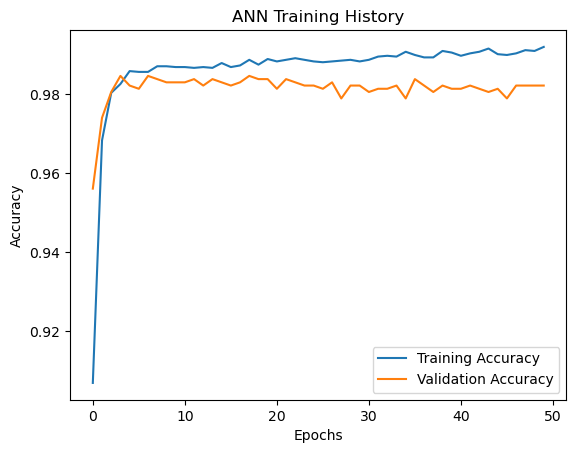

In [47]:
# ANN
model = Sequential()
model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2, verbose=1)

# Evaluate ANN
y_pred_ann = (model.predict(X_test) > 0.5).astype(int)
print("ANN Results:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_ann)}")
print(f"Precision: {precision_score(y_test, y_pred_ann)}")
print(f"Recall: {recall_score(y_test, y_pred_ann)}")
print(f"F1-Score: {f1_score(y_test, y_pred_ann)}")

# Plot ANN Training History
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('ANN Training History')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV] END ...................max_depth=3, min_samples_split=2; total time=   0.0s
[CV] END ...................max_depth=3, min_samples_split=2; total time=   0.0s
[CV] END ...................max_depth=3, min_samples_split=2; total time=   0.0s
[CV] END ...................max_depth=3, min_samples_split=2; total time=   0.0s
[CV] END ...................max_depth=3, min_samples_split=2; total time=   0.0s
[CV] END ...................max_depth=3, min_samples_split=5; total time=   0.0s
[CV] END ...................max_depth=3, min_samples_split=5; total time=   0.0s
[CV] END ...................max_depth=3, min_samples_split=5; total time=   0.0s
[CV] END ...................max_depth=3, min_samples_split=5; total time=   0.0s
[CV] END ...................max_depth=3, min_samples_split=5; total time=   0.0s
[CV] END ..................max_depth=3, min_samples_split=10; total time=   0.0s
[CV] END ..................max_depth=3, min_samp

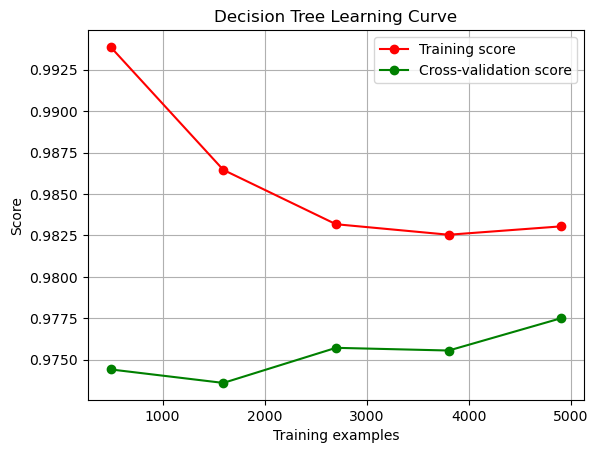

In [48]:
# Decision Tree with GridSearchCV
param_grid_dt = {'max_depth': [3, 5, 7, 10], 'min_samples_split': [2, 5, 10]}
grid_dt = GridSearchCV(DecisionTreeClassifier(), param_grid_dt, refit=True, verbose=2)
grid_dt.fit(X_train, y_train)

# Evaluate DT
y_pred_dt = grid_dt.predict(X_test)
print("Decision Tree Results:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_dt)}")
print(f"Precision: {precision_score(y_test, y_pred_dt)}")
print(f"Recall: {recall_score(y_test, y_pred_dt)}")
print(f"F1-Score: {f1_score(y_test, y_pred_dt)}")
plot_learning_curve(grid_dt.best_estimator_, "Decision Tree Learning Curve", X_train, y_train)

Fitting 5 folds for each of 4 candidates, totalling 20 fits
[CV] END ......................................n_neighbors=3; total time=   0.0s
[CV] END ......................................n_neighbors=3; total time=   0.0s
[CV] END ......................................n_neighbors=3; total time=   0.0s
[CV] END ......................................n_neighbors=3; total time=   0.0s
[CV] END ......................................n_neighbors=3; total time=   0.0s
[CV] END ......................................n_neighbors=5; total time=   0.0s
[CV] END ......................................n_neighbors=5; total time=   0.0s
[CV] END ......................................n_neighbors=5; total time=   0.0s
[CV] END ......................................n_neighbors=5; total time=   0.0s
[CV] END ......................................n_neighbors=5; total time=   0.0s
[CV] END ......................................n_neighbors=7; total time=   0.0s
[CV] END ......................................n_

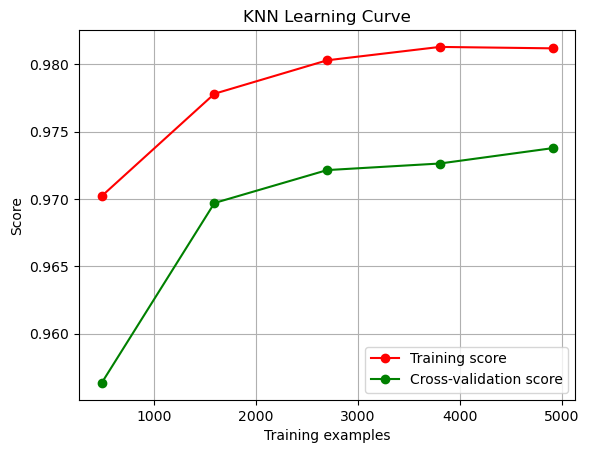

In [49]:
# KNN with GridSearchCV
param_grid_knn = {'n_neighbors': [3, 5, 7, 9]}
grid_knn = GridSearchCV(KNeighborsClassifier(), param_grid_knn, refit=True, verbose=2)
grid_knn.fit(X_train, y_train)

# Evaluate KNN
y_pred_knn = grid_knn.predict(X_test)
print("KNN Results:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_knn)}")
print(f"Precision: {precision_score(y_test, y_pred_knn)}")
print(f"Recall: {recall_score(y_test, y_pred_knn)}")
print(f"F1-Score: {f1_score(y_test, y_pred_knn)}")
plot_learning_curve(grid_knn.best_estimator_, "KNN Learning Curve", X_train, y_train)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV] END ................learning_rate=0.01, n_estimators=50; total time=   0.6s
[CV] END ................learning_rate=0.01, n_estimators=50; total time=   0.6s
[CV] END ................learning_rate=0.01, n_estimators=50; total time=   0.4s
[CV] END ................learning_rate=0.01, n_estimators=50; total time=   0.7s
[CV] END ................learning_rate=0.01, n_estimators=50; total time=   0.6s
[CV] END ...............learning_rate=0.01, n_estimators=100; total time=   1.1s
[CV] END ...............learning_rate=0.01, n_estimators=100; total time=   1.1s
[CV] END ...............learning_rate=0.01, n_estimators=100; total time=   1.0s
[CV] END ...............learning_rate=0.01, n_estimators=100; total time=   1.4s
[CV] END ...............learning_rate=0.01, n_estimators=100; total time=   1.7s
[CV] END ...............learning_rate=0.01, n_estimators=200; total time=   2.5s
[CV] END ...............learning_rate=0.01, n_est

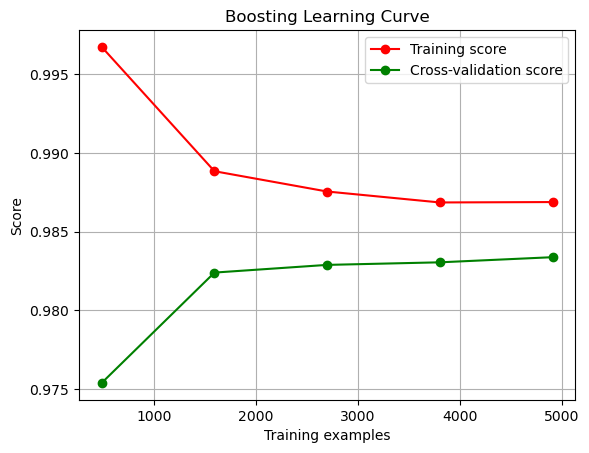

In [50]:
# Boosting with AdaBoost
param_grid_boost = {'n_estimators': [50, 100, 200], 'learning_rate': [0.01, 0.1, 1]}
grid_boost = GridSearchCV(AdaBoostClassifier(), param_grid_boost, refit=True, verbose=2)
grid_boost.fit(X_train, y_train)

# Evaluate Boosting
y_pred_boost = grid_boost.predict(X_test)
print("Boosting Results:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_boost)}")
print(f"Precision: {precision_score(y_test, y_pred_boost)}")
print(f"Recall: {recall_score(y_test, y_pred_boost)}")
print(f"F1-Score: {f1_score(y_test, y_pred_boost)}")
plot_learning_curve(grid_boost.best_estimator_, "Boosting Learning Curve", X_train, y_train)


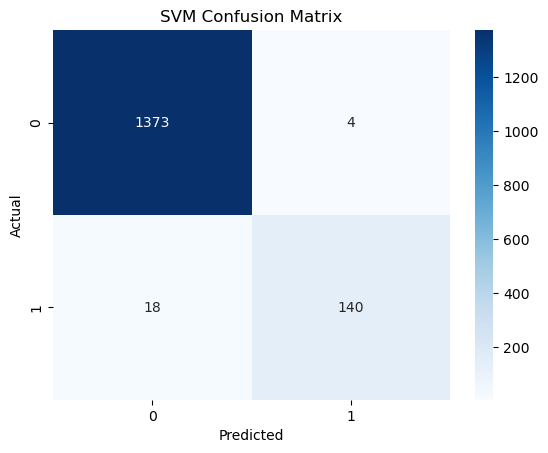

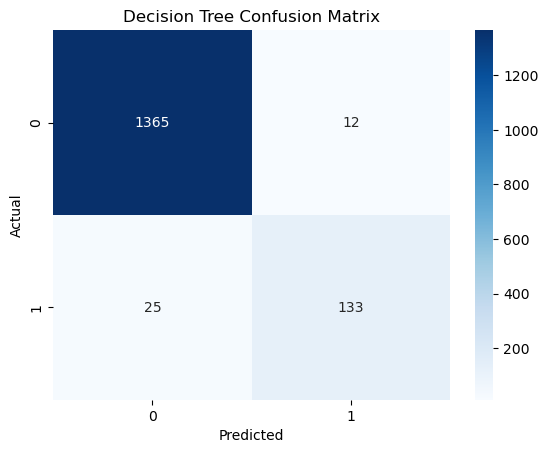

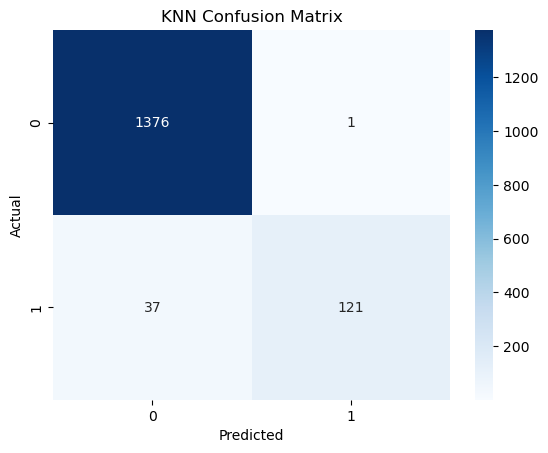

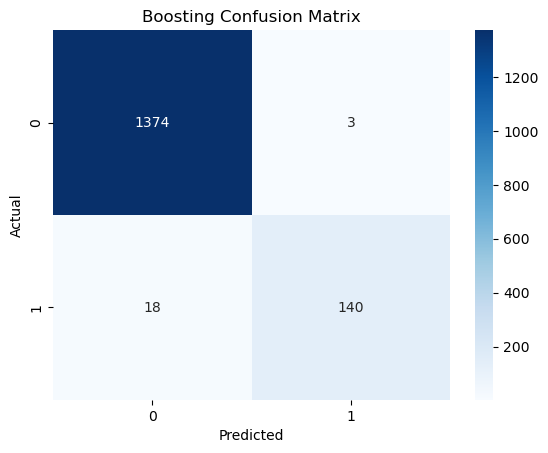

In [51]:
# Confusion Matrices
def plot_confusion_matrix(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(title)
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

plot_confusion_matrix(y_test, y_pred_svm, "SVM Confusion Matrix")
plot_confusion_matrix(y_test, y_pred_dt, "Decision Tree Confusion Matrix")
plot_confusion_matrix(y_test, y_pred_knn, "KNN Confusion Matrix")
plot_confusion_matrix(y_test, y_pred_boost, "Boosting Confusion Matrix")


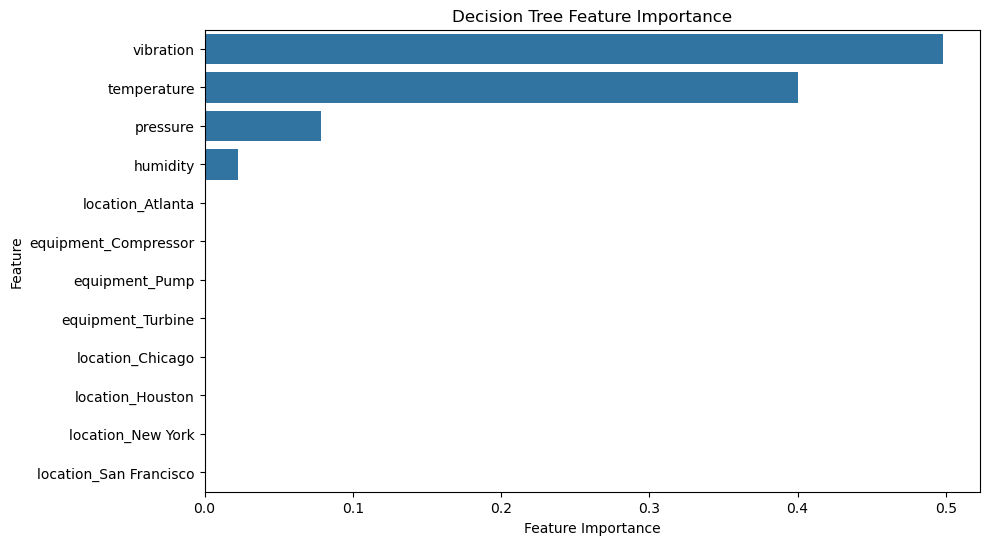

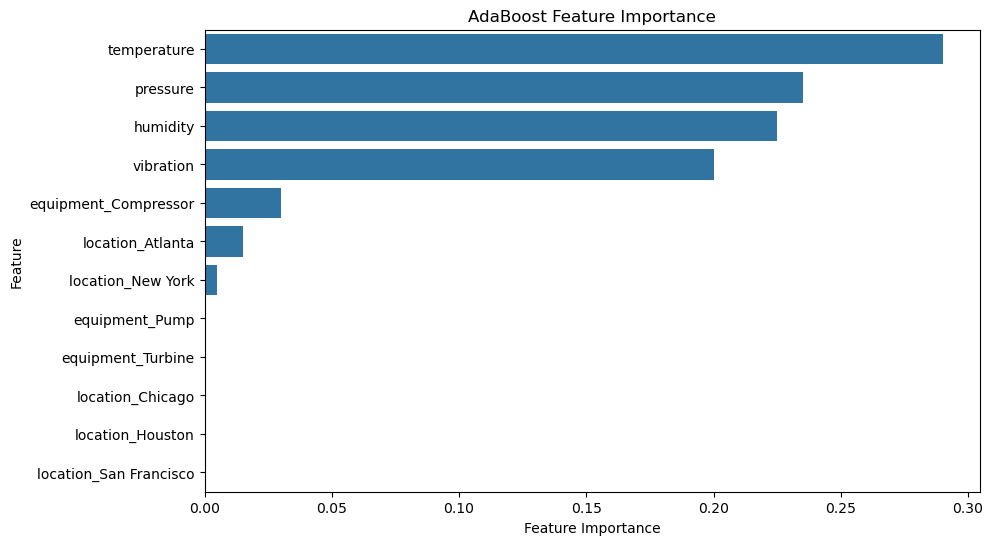

In [52]:
# Feature Importance Plots (for Decision Tree and AdaBoost)
def plot_feature_importance(importance, names, title):
    feature_importance = pd.DataFrame({'feature': names, 'importance': importance})
    feature_importance = feature_importance.sort_values(by='importance', ascending=False)
    plt.figure(figsize=(10, 6))
    sns.barplot(x='importance', y='feature', data=feature_importance)
    plt.title(title)
    plt.xlabel('Feature Importance')
    plt.ylabel('Feature')
    plt.show()

# Get feature names
feature_names = numeric_cols.tolist() + list(preprocessor.named_transformers_['cat'].get_feature_names_out(categorical_cols))

# Plot feature importance for Decision Tree
plot_feature_importance(grid_dt.best_estimator_.feature_importances_, feature_names, "Decision Tree Feature Importance")

# Plot feature importance for AdaBoost
plot_feature_importance(grid_boost.best_estimator_.feature_importances_, feature_names, "AdaBoost Feature Importance")

       Algorithm  Accuracy  Precision    Recall  F1-Score
0            SVM  0.985668   0.972222  0.886076  0.927152
1  Decision Tree  0.975896   0.917241  0.841772  0.877888
2            KNN  0.975244   0.991803  0.765823  0.864286
3       Boosting  0.986319   0.979021  0.886076  0.930233
4            ANN  0.981759   0.933333  0.886076  0.909091


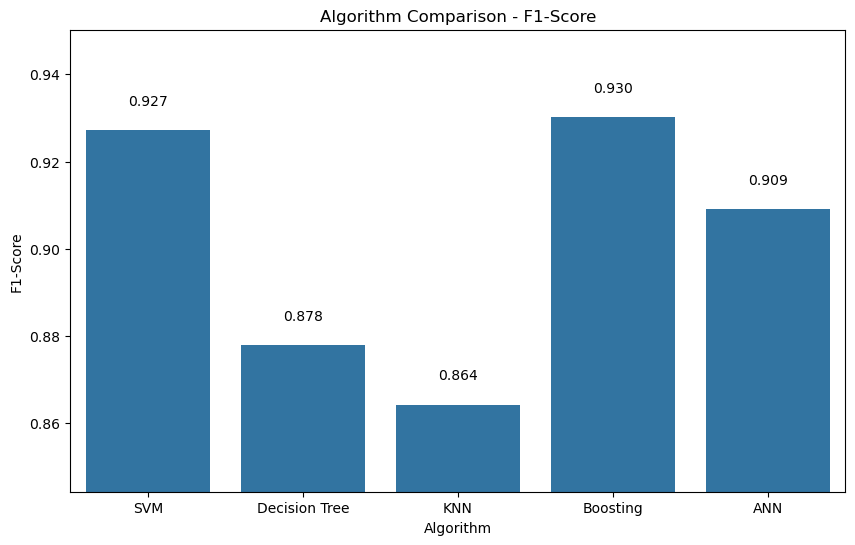

In [55]:
# Comparison of Algorithms (including ANN)
results = {
    'Algorithm': ['SVM', 'Decision Tree', 'KNN', 'Boosting', 'ANN'],
    'Accuracy': [accuracy_score(y_test, y_pred_svm), accuracy_score(y_test, y_pred_dt), accuracy_score(y_test, y_pred_knn), accuracy_score(y_test, y_pred_boost), accuracy_score(y_test, y_pred_ann)],
    'Precision': [precision_score(y_test, y_pred_svm), precision_score(y_test, y_pred_dt), precision_score(y_test, y_pred_knn), precision_score(y_test, y_pred_boost), precision_score(y_test, y_pred_ann)],
    'Recall': [recall_score(y_test, y_pred_svm), recall_score(y_test, y_pred_dt), recall_score(y_test, y_pred_knn), recall_score(y_test, y_pred_boost), recall_score(y_test, y_pred_ann)],
    'F1-Score': [f1_score(y_test, y_pred_svm), f1_score(y_test, y_pred_dt), f1_score(y_test, y_pred_knn), f1_score(y_test, y_pred_boost), f1_score(y_test, y_pred_ann)]
}

results_df = pd.DataFrame(results)
print(results_df)

# Bar plot for F1-Score comparison (including ANN)
plt.figure(figsize=(10, 6))
sns.barplot(x='Algorithm', y='F1-Score', data=results_df)
plt.title("Algorithm Comparison - F1-Score")
plt.xlabel("Algorithm")
plt.ylabel("F1-Score")

# Adjust y-axis scale for F1-Score
min_f1 = results_df['F1-Score'].min() - 0.02
max_f1 = results_df['F1-Score'].max() + 0.02
plt.ylim(min_f1, max_f1)

# Add data labels
for index, value in enumerate(results_df['F1-Score']):
    plt.text(index, value + 0.005, f'{value:.3f}', ha='center', va='bottom')

plt.show()